# Lead Scoring Case Study

## Importing Packages and Reading Dataset

In [68]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
# Read the dataset

leads = pd.read_csv('Leads.csv')

## Normal Routine Check

In [72]:
# Look at the first few entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [73]:
leads.shape

(9240, 37)

In [74]:
leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,61922323-52c8-4aec-a30c-9c5dcec3274a,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [75]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning and Preparation

In [76]:
#Check null value counts
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [77]:
#Checking percentage of null values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Observation: A lot of columns have null values in high numbers which needs to be handled

In [78]:
#Checking value counts of all columns to understand the data variations
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

#### According to the data dictionary, some features are updated by the sales team based on their analysis and understanding. As the model should predict the lead before handing it over to sales team so the following columns should not be used for model
- Tags
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

In [79]:
#Dropping the columns updated by sales team
leads.drop(['Tags','Lead Quality','Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
            'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1, inplace = True)

#### Based on the problem description and data understanding, a lot of columns have 'Select' value. It indicates that the user did not selected any option. So it could be considered as null  and processed accordingly.

In [80]:
#Updating all 'Select' values to nan
leads = leads.replace('Select', np.nan)


In [81]:
#Checking null percentage of update dataset
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [82]:
# Dropping all the columns with very high percentage of null values. So dropping columns with more than 50% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 50):
        leads.drop(i, 1, inplace = True)

In [83]:
#Checck null percentage of updated dataset
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [84]:
#Prospect ID and Lead Number have unique values. Only dropping the Lead Number as Prospect ID could be used to identify the custome

leads.drop(['Lead Number'], 1, inplace = True)

In [85]:
#Checking Country column
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Italy                      2
Bangladesh                 2
China                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
Switzerland                1
Tanzania                   1
Denmark                    1
Kenya                      1
Indonesia                  1
Vietnam       

In [86]:
#Country column is predominantly populated with India and high number of null values. 
#Dropping the column as it has is not going to add value to the model
leads.drop(['Country'], axis = 1, inplace = True)

In [87]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [88]:
#City column is predominantly populated with null and Mumbai. 
#Dropping the column as it has is not going to add value to the model
leads.drop(['City'], axis = 1, inplace = True)

In [89]:
cols=['Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine', 
            'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque']

#Checking value counts of all columns to understand the data variations
for column in cols:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

No     9238
Yes       2
Name: Do Not Call, dtype: int64
___________________________________________________
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
___________________________________________________
No     9226
Yes      14
Name: Search, dtype: int64
___________________________________________________
No    9240
Name: Magazine, dtype: int64
___________________________________________________
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
___________________________________________________
No     9239
Yes       1
Name: X Education Forums, dtype: int64
___________________________________________________
No     9239
Yes       1
Name: Newspaper, dtype: int64
___________________________________________________
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
___________________________________________________
No     9233
Yes       7


#### Following columns are mostly populated with 1 value and as such don't add value to the model and should be dropped.
- Do Not Call
- What matters most to you in choosing a course
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [90]:
#Dropping the columns which 
leads.drop(['Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine', 
            'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [91]:
#Checking null percentage of updated dataset
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [92]:
#Checking Specialization
leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [93]:
#Specialization seems to be an important factor in determining the outcome. 
#Replacing null values with others as Specialization could be diverse and not everything is covered.
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [94]:
#Checking What is your current occupation
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [95]:
#Current occupation could be an important feature of the model. Replacing null with other
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Other')

In [96]:
#Checking null percentage
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [97]:
# Checking TotalVisits
leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
24.0        5
27.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
141.0       1
41.0        1
55.0        1
115.0       1
32.0        1
54.0        1
42.0        1
251.0       1
74.0        1
43.0        1
30.0        1
Name: TotalVisits, dtype: int64

In [98]:
#Checking records where TotalVisits is null
leads[pd.isnull(leads['TotalVisits'])]

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,Lead Add Form,Welingak Website,No,1,NaN,1096,NaN,NaN,Others,Unemployed,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,Lead Add Form,Reference,No,1,NaN,705,NaN,NaN,Hospitality Management,Working Professional,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,Lead Add Form,Welingak Website,No,1,NaN,346,NaN,NaN,Others,Unemployed,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,Lead Add Form,Reference,No,1,NaN,1007,NaN,NaN,Human Resource Management,Unemployed,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,Lead Add Form,Reference,No,1,NaN,1111,NaN,NaN,Marketing Management,Working Professional,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,Lead Add Form,Reference,No,0,NaN,1201,NaN,NaN,Marketing Management,Unemployed,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,Lead Add Form,Reference,No,1,NaN,903,NaN,NaN,"Banking, Investment And Insurance",Working Professional,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,Lead Add Form,Reference,No,1,NaN,1458,NaN,NaN,Others,Unemployed,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,Lead Add Form,Reference,No,1,NaN,1159,NaN,NaN,Supply Chain Management,Working Professional,No,Modified


In [99]:
#Dropping rows with null as number of rows is small
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [100]:
#Checking null percentage
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.00
Lead Origin                               0.00
Lead Source                               0.32
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [101]:
#Dropping rows with null as number of rows is small
leads = leads[~pd.isnull(leads['Lead Source'])]

In [102]:
#Checking null percentage of updated dataset
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [103]:
print(len(leads.index)/9240)

0.982034632034632


#### 98% of total records are left after removing null records

In [104]:
#Checking dataset
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


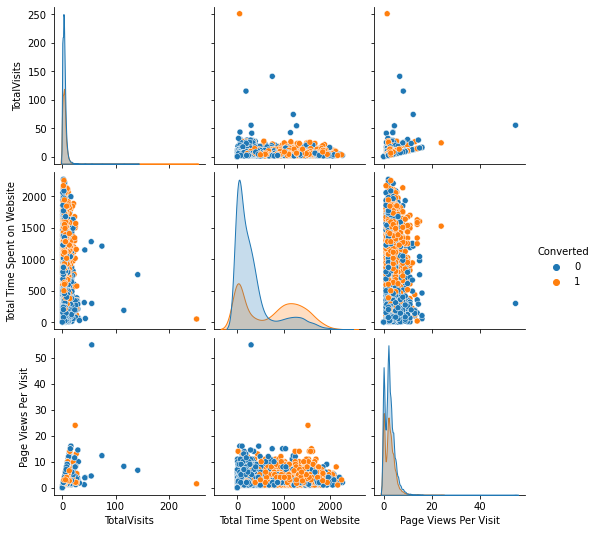

In [105]:
#Checking continuous variable using pair plot
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

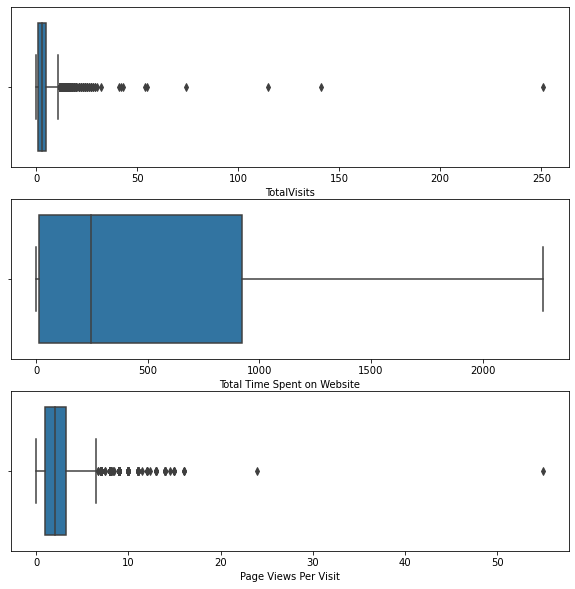

In [106]:
#Checking outliers using boxplot
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.boxplot(leads['TotalVisits'])

plt.subplot(3,1,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(leads['Page Views Per Visit'])

plt.show()

#### TotalVisits and Page Views Per visit have outliers

In [107]:
#Checking percentile of TotalVisits
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [108]:
#Dropping rows above 99 percentile of TotalVisits
Q3 = leads['TotalVisits'].quantile(0.99)
leads = leads[leads['TotalVisits'] <= Q3]

In [109]:
#Checking percentile of Page Views Per Visit
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [110]:
#Dropping rows above 99 percentile of TotalVisits
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]

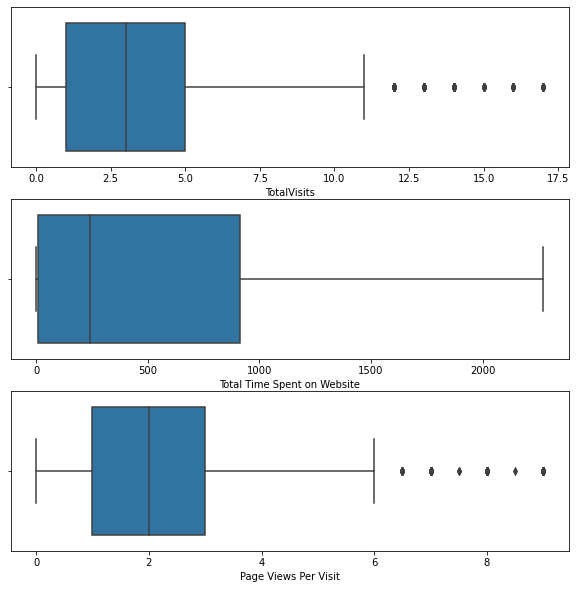

In [111]:
#Checking data after outlier treatment
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.boxplot(leads['TotalVisits'])

plt.subplot(3,1,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(leads['Page Views Per Visit'])

plt.show()

#### Most of the outliers has been handled

In [112]:
print(len(leads.index)/9240)

0.9658008658008658


#### After outlier treatment, more than 96 percent of original dataset is retained

<AxesSubplot:>

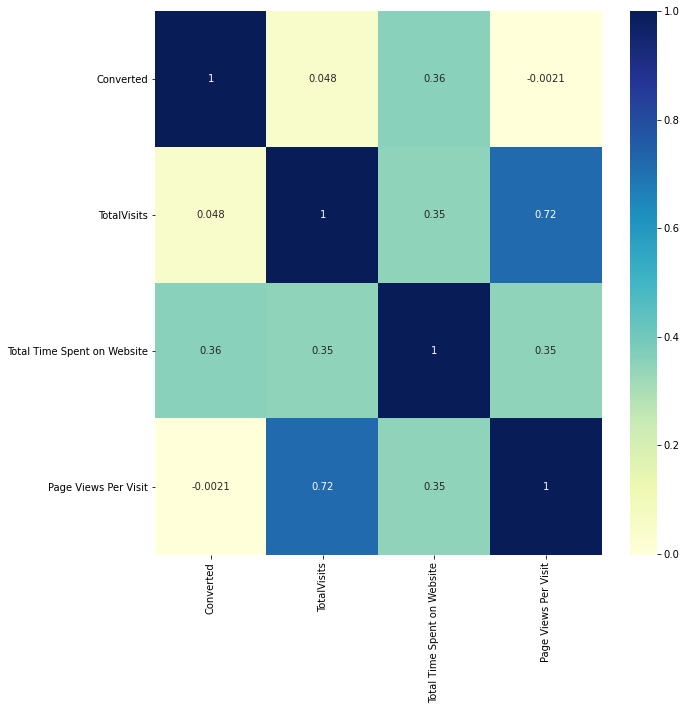

In [113]:
#Checking correlation using heatmap
plt.figure(figsize=(10, 10))  
sns.heatmap(leads.corr(),annot = True, cmap="YlGnBu")

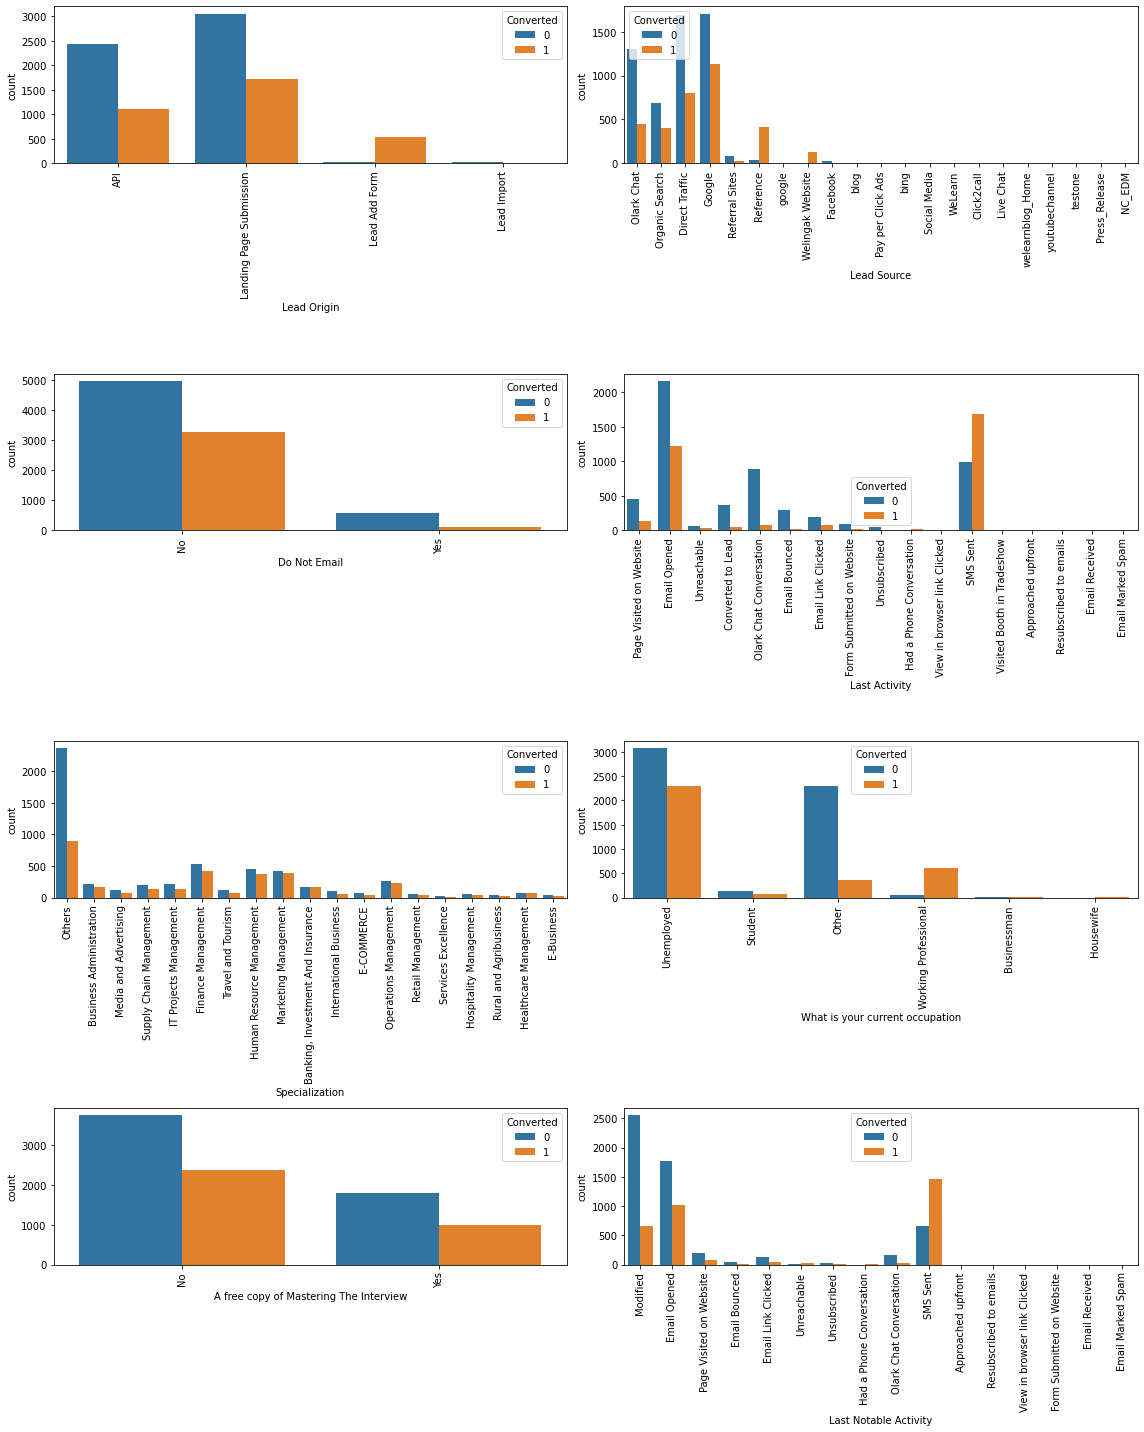

In [114]:
#Checking categorical columns
fig = plt.figure(figsize = (16,20))

p1=plt.subplot(4,2,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = leads)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

p2=plt.subplot(4,2,2)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = leads)
p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

plt.subplot(4,2,3)
p3=sns.countplot(x = 'Do Not Email', hue = 'Converted', data = leads)
p3.set_xticklabels(p3.get_xticklabels(),rotation=90)

plt.subplot(4,2,4)
p4=sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads)
p4.set_xticklabels(p4.get_xticklabels(),rotation=90)

plt.subplot(4,2,5)
p5=sns.countplot(x = 'Specialization', hue = 'Converted', data = leads)
p5.set_xticklabels(p5.get_xticklabels(),rotation=90)

plt.subplot(4,2,6)
p6=sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = leads)
p6.set_xticklabels(p6.get_xticklabels(),rotation=90)

plt.subplot(4,2,7)
p7=sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = leads)
p7.set_xticklabels(p7.get_xticklabels(),rotation=90)

plt.subplot(4,2,8)
p8=sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = leads)
p8.set_xticklabels(p8.get_xticklabels(),rotation=90)

fig.tight_layout()

plt.show()

#### Observation: Based on the above some of the categories are more likely to convert 
- Lead Origin: Lead Add Form
- Lead Source: Reference and Welingak Website
- Last Activity: SMS Sent
- Current Occupation: Working Professional
- Last Notable Activity: SMS Sent

### For categorical variables with multiple levels, creating dummy features

In [115]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [116]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [117]:
#Specialization column null were changed to Others so only dropping that column after dummy column creation
dummy_specialization = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_specialization = dummy_specialization.drop(['Specialization_Others'], 1)
leads = pd.concat([leads, dummy_specialization], axis = 1)

In [118]:
#What is your current occupation column null were changed to Other so only dropping that column after dummy column creation
dummy_current_occupation = pd.get_dummies(leads['What is your current occupation'],prefix = 'What is your current occupation')
dummy_current_occupation = dummy_current_occupation.drop(['What is your current occupation_Other'], 1)
leads = pd.concat([leads, dummy_current_occupation], axis = 1)

In [119]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [120]:
# Checking the dataset again

leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [121]:
leads.shape

(8924, 84)

In [122]:
### Checking the Conversion percentage
converted_percent = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted_percent

37.75212909009413

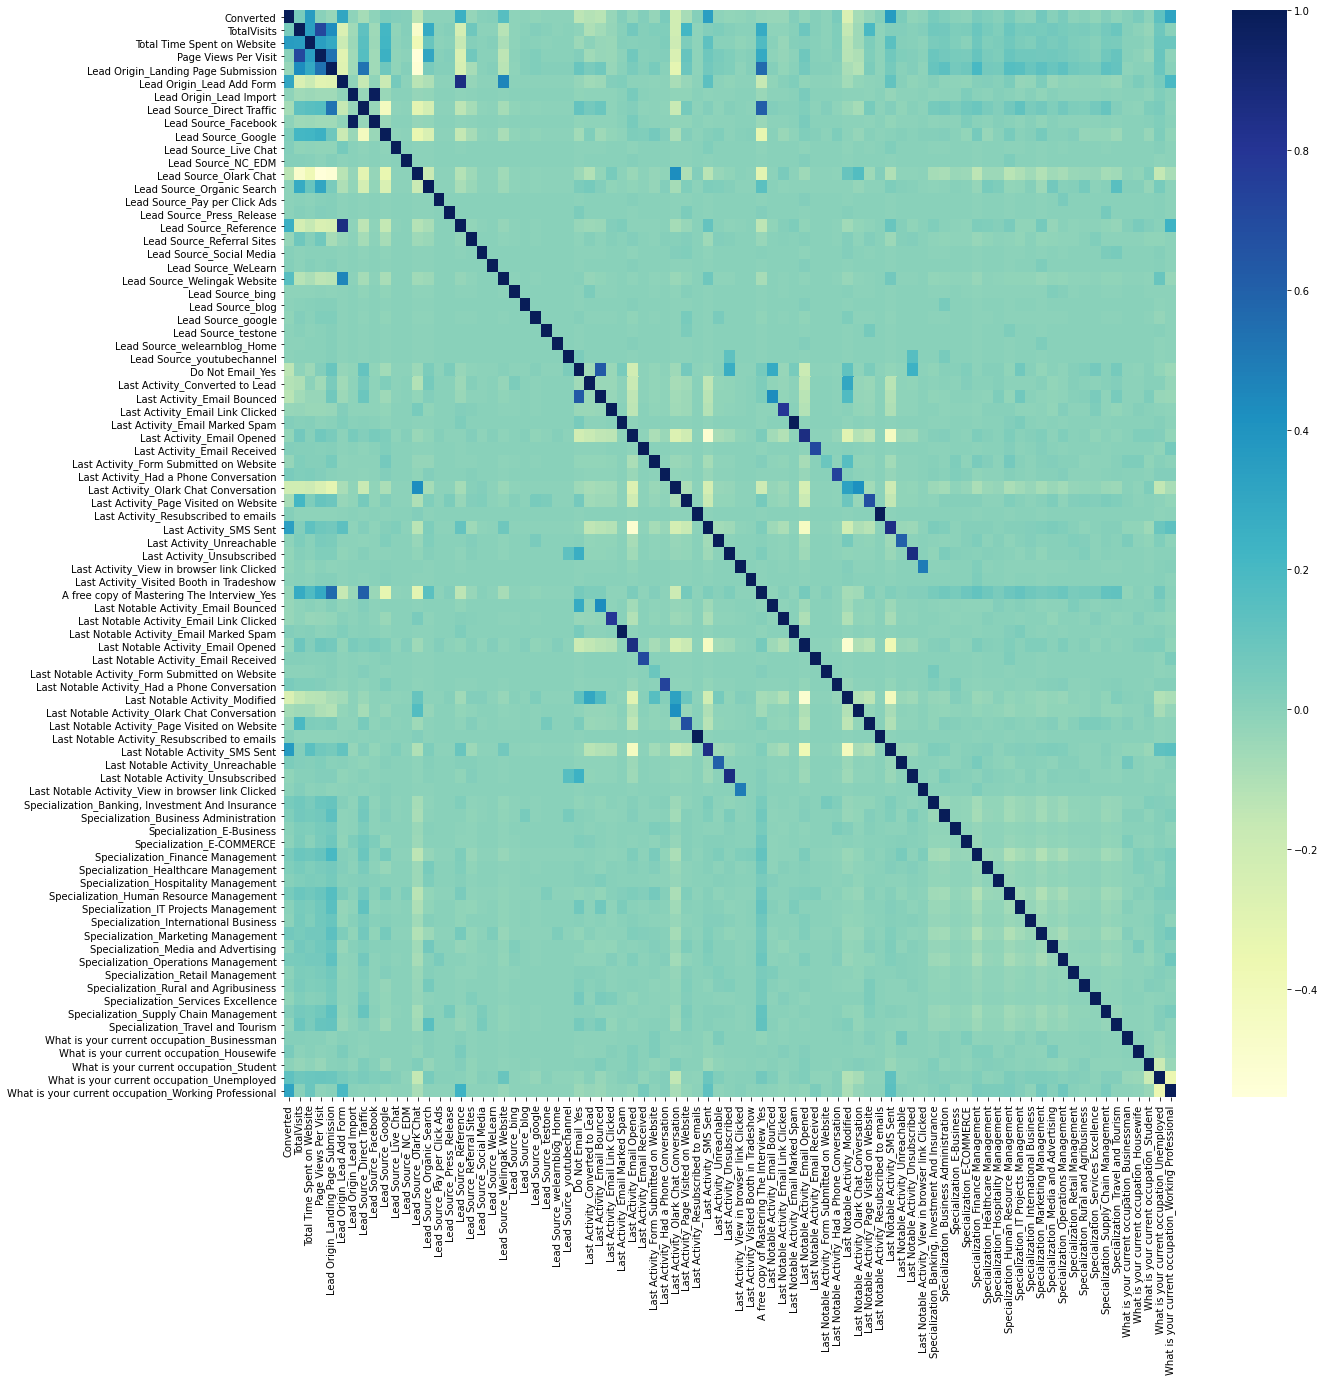

In [123]:
# Figure size
plt.figure(figsize=(20,20))

# Heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu")
plt.show()

## Model Building

### Test-Train Split

In [124]:
# Import the required library

from sklearn.model_selection import train_test_split

In [125]:
# Put all the feature variables in X

X = leads.drop(['Prospect ID','Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [126]:
# Put the target variable in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [127]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [128]:
# Import MinMax scaler

from sklearn.preprocessing import StandardScaler

In [129]:
# Scale the three numeric features present in the dataset

scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6676,-0.049636,1.395668,0.395289,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6138,0.297929,0.609686,0.926758,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8650,-0.049636,1.178657,0.395289,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3423,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6552,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
# Import statsmodels

import statsmodels.api as sm

In [131]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6170
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2420.6
Date:                Tue, 23 Dec 2025   Deviance:                       4841.2
Time:                        22:08:59   Pearson chi2:                 6.15e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.8219   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              0.3242      0.054      5.995      0.000       0.218       0.430
Total Time Spent on Website                              1.0847      0.042     25.621      0.000       1.002       1.168
Page Views Per Visit                                    -0.3364      0.060     -5.597      0.000      -0.454      -0.219
Lead Origin_Landing Page Submission                     -0.7265      0.143     -5.078      0.000      -1.007      -0.446
Lead Origin_Lead Add Form                                0.6950      1.365      0.509      0.611      -1.980       3.370
Lead Origin_Lead Import                                 23.5091   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -1.0164      1.855     -0.548      0.584      -4.652       2.619
Lead Source_Facebook                                   -23.7088   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -0.7566      1.852     -0.409      0.683      -4.386       2.872
Lead Source_Live Chat                                   22.5337   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_NC_EDM                                    -5.52e-09   2.25e-05     -0.000      1.000   -4.42e-05    4.42e-05
Lead Source_Olark Chat                                   0.2671      1.851      0.144      0.885      -3.361       3.895
Lead Source_Organic Search                              -0.7940      1.856     -0.428      0.669      -4.431       2.843
Lead Source_Pay per Click Ads                          -22.6506   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -20.5601   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.5697      1.273      1.233      0.218      -0.926       4.066
Lead Source_Referral Sites                              -0.9708      1.881     -0.516      0.606      -4.657       2.715
Lead Source_Social Media                              3.239e-09   1.13e-05      0.000      1.000   -2.21e-05    2.21e-05
Lead Source_WeLearn                                     22.1646   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             3.7750      1.452      2.600      0.009       0.929       6.621
Lead Source_bing                                       -20.8397   5.54e+04     -0.000      1.000   -1.09e+05    1.09e+05
Lead Source_blog                                       -22

### Feature Selection Using RFE

In [137]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(
    solver='liblinear',   # important
    max_iter=1000)

In [138]:
# Import RFE and select 20 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [139]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 52),
 ('Lead Source_NC_EDM', False, 61),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 54),
 ('Lead Source_blog', False, 43),
 ('Lead Source_google', False, 40),
 ('Lead Source_testone', False, 38),
 ('Lead Source_welearnblog_Home', False, 47),
 ('

In [140]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [141]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [142]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2509.0
Date:                Tue, 23 Dec 2025   Deviance:                       5018.0
Time:                        22:13:52   Pearson chi2:                 6.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6438      0.102     -6.306      0.000      -0.844      -0.444
Total Time Spent on Website                              1.1084      0.041     26.853      0.000       1.027       1.189
Lead Origin_Lead Add Form                                2.1626      0.897      2.411      0.016       0.405       3.920
Lead Source_Olark Chat                                   1.2765      0.106     12.073      0.000       1.069       1.484
Lead Source_Reference                                    1.5624      0.923      1.693      0.090      -0.246       3.371
Lead Source_Welingak Website                             3.3389      1.153      2.897      0.004       1.080       5.598
Do Not Email_Yes                                        -1.5143      0.208     -7.277      0.000      -1.922      -1.106
Last Activity_Converted to Lead                         -1.2052      0.230     -5.238      0.000      -1.656      -0.754
Last Activity_Email Bounced                             -1.3525      0.421     -3.215      0.001      -2.177      -0.528
Last Activity_Had a Phone Conversation                   1.9536      1.013      1.928      0.054      -0.032       3.939
Last Activity_Olark Chat Conversation                   -1.3719      0.201     -6.809      0.000      -1.767      -0.977
Last Notable Activity_Email Link Clicked                -1.8192      0.262     -6.952      0.000      -2.332      -1.306
Last Notable Activity_Email Opened                      -1.4119      0.090    -15.719      0.000      -1.588      -1.236
Last Notable Activity_Had a Phone Conversation          19.9596   1.73e+04      0.001      0.999    -3.4e+04     3.4e+04
Last Notable Activity_Modified                          -1.5830      0.103    -15.296      0.000      -1.786      -1.380
Last Notable Activity_Olark Chat Conversation           -1.3578      0.374     -3.626      0.000      -2.092      -0.624
Last Notable Activity_Page Visited on Website           -1.7002      0.207     -8.205      0.000      -2.106      -1.294
What is your current occupation_Housewife               23.9626   1.72e+04      0.001      0.999   -3.36e+04    3.37e+04
What is your current occupation_Student                  0.9815      0.239      4.100      0.000       0.512       1.451
What is your current occupation_Unemployed               1.0506      0.089     11.861      0.000       0.877       1.224
What is your current occupation_Working Professional     3.4975      0.200     17.516      0.000       3.106       3.889
========================================================================================================================
"""

In [143]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,49.66
3,Lead Source_Reference,39.19
4,Lead Source_Welingak Website,11.53
13,Last Notable Activity_Modified,2.25
9,Last Activity_Olark Chat Conversation,2.06
18,What is your current occupation_Unemployed,1.95
5,Do Not Email_Yes,1.83
7,Last Activity_Email Bounced,1.81
2,Lead Source_Olark Chat,1.69
8,Last Activity_Had a Phone Conversation,1.68


#### Using threshold of 5 for VIF and 0.05 for p, Lead Source_Reference has high p value as well as high VIF, so dropping the column

In [145]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [146]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.2
Date:                Tue, 23 Dec 2025   Deviance:                       5020.4
Time:                        22:13:53   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6426      0.102     -6.295      0.000      -0.843      -0.443
Total Time Spent on Website                              1.1076      0.041     26.832      0.000       1.027       1.189
Lead Origin_Lead Add Form                                3.6580      0.226     16.206      0.000       3.216       4.100
Lead Source_Olark Chat                                   1.2741      0.106     12.046      0.000       1.067       1.481
Lead Source_Welingak Website                             1.8416      0.756      2.435      0.015       0.359       3.324
Do Not Email_Yes                                        -1.5111      0.208     -7.272      0.000      -1.918      -1.104
Last Activity_Converted to Lead                         -1.2065      0.230     -5.243      0.000      -1.657      -0.756
Last Activity_Email Bounced                             -1.3562      0.421     -3.225      0.001      -2.181      -0.532
Last Activity_Had a Phone Conversation                   1.9539      1.012      1.930      0.054      -0.030       3.938
Last Activity_Olark Chat Conversation                   -1.3717      0.201     -6.810      0.000      -1.766      -0.977
Last Notable Activity_Email Link Clicked                -1.8149      0.261     -6.950      0.000      -2.327      -1.303
Last Notable Activity_Email Opened                      -1.4131      0.090    -15.736      0.000      -1.589      -1.237
Last Notable Activity_Had a Phone Conversation          19.9590   1.73e+04      0.001      0.999    -3.4e+04     3.4e+04
Last Notable Activity_Modified                          -1.5825      0.103    -15.300      0.000      -1.785      -1.380
Last Notable Activity_Olark Chat Conversation           -1.3576      0.374     -3.626      0.000      -2.091      -0.624
Last Notable Activity_Page Visited on Website           -1.7042      0.208     -8.212      0.000      -2.111      -1.297
What is your current occupation_Housewife               23.9656   1.72e+04      0.001      0.999   -3.37e+04    3.37e+04
What is your current occupation_Student                  0.9859      0.239      4.126      0.000       0.518       1.454
What is your current occupation_Unemployed               1.0500      0.089     11.856      0.000       0.876       1.224
What is your current occupation_Working Professional     3.4993      0.200     17.533      0.000       3.108       3.890
========================================================================================================================
"""

In [147]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,2.25
8,Last Activity_Olark Chat Conversation,2.06
17,What is your current occupation_Unemployed,1.95
4,Do Not Email_Yes,1.83
6,Last Activity_Email Bounced,1.81
2,Lead Source_Olark Chat,1.68
7,Last Activity_Had a Phone Conversation,1.68
11,Last Notable Activity_Had a Phone Conversation,1.67
1,Lead Origin_Lead Add Form,1.53
10,Last Notable Activity_Email Opened,1.49


#### VIF are in range but Last Notable Activity_Had a Phone Conversation P value is very high so dropping the column

In [148]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [149]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.6
Date:                Tue, 23 Dec 2025   Deviance:                       5021.3
Time:                        22:13:54   Pearson chi2:                 6.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6411      0.102     -6.281      0.000      -0.841      -0.441
Total Time Spent on Website                              1.1075      0.041     26.828      0.000       1.027       1.188
Lead Origin_Lead Add Form                                3.6579      0.226     16.203      0.000       3.215       4.100
Lead Source_Olark Chat                                   1.2739      0.106     12.042      0.000       1.067       1.481
Lead Source_Welingak Website                             1.8426      0.756      2.436      0.015       0.360       3.325
Do Not Email_Yes                                        -1.5145      0.208     -7.291      0.000      -1.922      -1.107
Last Activity_Converted to Lead                         -1.2044      0.230     -5.235      0.000      -1.655      -0.753
Last Activity_Email Bounced                             -1.3530      0.421     -3.217      0.001      -2.177      -0.529
Last Activity_Had a Phone Conversation                   2.3319      0.920      2.535      0.011       0.529       4.135
Last Activity_Olark Chat Conversation                   -1.3696      0.201     -6.800      0.000      -1.764      -0.975
Last Notable Activity_Email Link Clicked                -1.8166      0.261     -6.957      0.000      -2.328      -1.305
Last Notable Activity_Email Opened                      -1.4148      0.090    -15.759      0.000      -1.591      -1.239
Last Notable Activity_Modified                          -1.5862      0.103    -15.351      0.000      -1.789      -1.384
Last Notable Activity_Olark Chat Conversation           -1.3612      0.374     -3.636      0.000      -2.095      -0.627
Last Notable Activity_Page Visited on Website           -1.7056      0.208     -8.219      0.000      -2.112      -1.299
What is your current occupation_Housewife               23.9663   1.72e+04      0.001      0.999   -3.37e+04    3.37e+04
What is your current occupation_Student                  0.9863      0.239      4.127      0.000       0.518       1.455
What is your current occupation_Unemployed               1.0503      0.089     11.857      0.000       0.877       1.224
What is your current occupation_Working Professional     3.4992      0.200     17.530      0.000       3.108       3.890
========================================================================================================================
"""

In [150]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,2.24
8,Last Activity_Olark Chat Conversation,2.06
16,What is your current occupation_Unemployed,1.95
4,Do Not Email_Yes,1.83
6,Last Activity_Email Bounced,1.81
2,Lead Source_Olark Chat,1.68
1,Lead Origin_Lead Add Form,1.53
10,Last Notable Activity_Email Opened,1.49
12,Last Notable Activity_Olark Chat Conversation,1.38
0,Total Time Spent on Website,1.30


#### VIF are in range but What is your current occupation_Housewife P value is very high so dropping the column

In [151]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [152]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.9
Date:                Tue, 23 Dec 2025   Deviance:                       5037.8
Time:                        22:13:54   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6197      0.102     -6.095      0.000      -0.819      -0.420
Total Time Spent on Website                              1.1072      0.041     26.871      0.000       1.026       1.188
Lead Origin_Lead Add Form                                3.6713      0.226     16.264      0.000       3.229       4.114
Lead Source_Olark Chat                                   1.2650      0.106     11.982      0.000       1.058       1.472
Lead Source_Welingak Website                             1.8280      0.756      2.417      0.016       0.346       3.310
Do Not Email_Yes                                        -1.5166      0.208     -7.305      0.000      -1.924      -1.110
Last Activity_Converted to Lead                         -1.2101      0.230     -5.263      0.000      -1.661      -0.759
Last Activity_Email Bounced                             -1.3529      0.420     -3.219      0.001      -2.177      -0.529
Last Activity_Had a Phone Conversation                   2.3279      0.920      2.530      0.011       0.525       4.131
Last Activity_Olark Chat Conversation                   -1.3741      0.201     -6.828      0.000      -1.768      -0.980
Last Notable Activity_Email Link Clicked                -1.8171      0.261     -6.961      0.000      -2.329      -1.305
Last Notable Activity_Email Opened                      -1.4062      0.090    -15.687      0.000      -1.582      -1.230
Last Notable Activity_Modified                          -1.5813      0.103    -15.325      0.000      -1.784      -1.379
Last Notable Activity_Olark Chat Conversation           -1.3570      0.374     -3.627      0.000      -2.090      -0.624
Last Notable Activity_Page Visited on Website           -1.7073      0.207     -8.232      0.000      -2.114      -1.301
What is your current occupation_Student                  0.9617      0.239      4.026      0.000       0.494       1.430
What is your current occupation_Unemployed               1.0260      0.088     11.662      0.000       0.854       1.198
What is your current occupation_Working Professional     3.4744      0.199     17.429      0.000       3.084       3.865
========================================================================================================================
"""

In [153]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,2.24
8,Last Activity_Olark Chat Conversation,2.06
15,What is your current occupation_Unemployed,1.94
4,Do Not Email_Yes,1.83
6,Last Activity_Email Bounced,1.81
2,Lead Source_Olark Chat,1.68
1,Lead Origin_Lead Add Form,1.53
10,Last Notable Activity_Email Opened,1.48
12,Last Notable Activity_Olark Chat Conversation,1.38
0,Total Time Spent on Website,1.29


#### Observation: VIF and P value are in range.

### Model Evaluation 
Both the p-values and VIFs are in range for all the variables. So predicting using the final set of features.

In [154]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred

6676    0.633070
6138    0.746747
8650    0.940111
3423    0.036175
6552    0.150160
          ...   
379     0.050906
84      0.536477
8341    0.150160
7191    0.937679
5847    0.527008
Length: 6246, dtype: float64

In [155]:
y_train_pred = pd.DataFrame(y_train_pred)

In [156]:
y_train_pred['id']=y_train_pred.index
y_train_pred.head()

,0,id
6676,0.633070,6676
6138,0.746747,6138
8650,0.940111,8650
3423,0.036175,3423
6552,0.150160,6552


In [157]:
y_train_pred.rename(columns = {0:'Conversion_Prob'}, inplace = True) 
y_train_pred.head()

,Conversion_Prob,id
6676,0.633070,6676
6138,0.746747,6138
8650,0.940111,8650
3423,0.036175,3423
6552,0.150160,6552


In [158]:
# Reshaping it into an array

#y_train_pred = y_train_pred.values.reshape(-1)
#y_train_pred

In [159]:
y_train_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [160]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.concat([y_train,y_train_pred],axis=1)
#y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob,id
0,1,0.633070,6676
1,1,0.746747,6138
2,1,0.940111,8650
3,0,0.036175,3423
4,0,0.150160,6552


In [161]:
#Using the probability of 0.5 to predict
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,id,Predicted
0,1,0.633070,6676,1
1,1,0.746747,6138,1
2,1,0.940111,8650,1
3,0,0.036175,3423,0
4,0,0.150160,6552,0


In [162]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [163]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3433  438]
 [ 704 1671]]


In [164]:
# Check the accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8171629843099584


In [165]:
# Checking other metrices

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Calculate the sensitivity

TP/(TP+FN)

0.7035789473684211

In [167]:
# Calculate the specificity

TN/(TN+FP)

0.8868509429088091

In [168]:
# Calculate the Precision
TP/(TP+FP)

0.7923186344238976

In [169]:
# Calculate the Recall
TP/(TP+FN)

0.7035789473684211

In [170]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

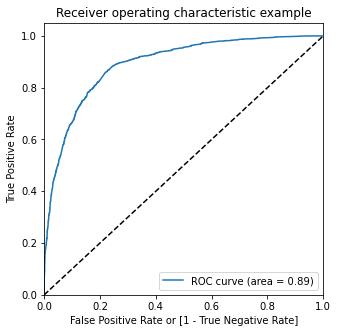

In [172]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Observation: Area under the curve is 0.89

In [173]:
# Create columns with different probability cutoffs to identify the best probability

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.633070,6676,1,1,1,1,1,1,1,1,0,0,0
1,1,0.746747,6138,1,1,1,1,1,1,1,1,1,0,0
2,1,0.940111,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.036175,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.150160,6552,0,1,1,0,0,0,0,0,0,0,0


In [174]:
# Check accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.626961  0.974316  0.413847
0.2   0.2  0.767051  0.912000  0.678119
0.3   0.3  0.807077  0.868632  0.769310
0.4   0.4  0.817803  0.788632  0.835701
0.5   0.5  0.817163  0.703579  0.886851
0.6   0.6  0.808517  0.630316  0.917851
0.7   0.7  0.783541  0.515368  0.948075
0.8   0.8  0.763208  0.427789  0.969000
0.9   0.9  0.714377  0.271579  0.986050


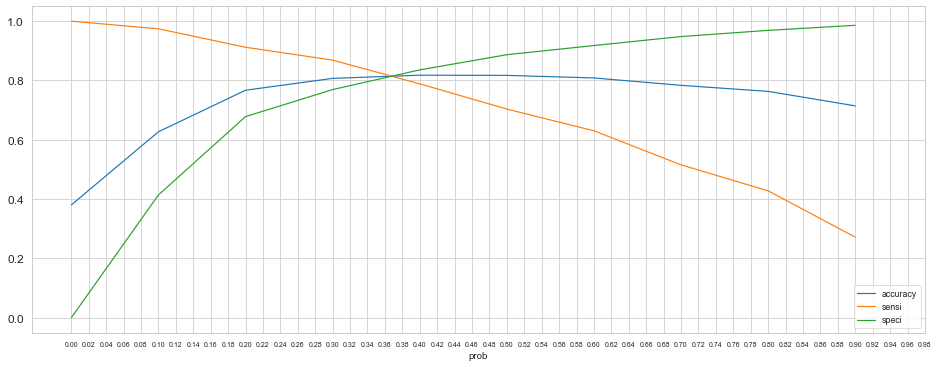

In [175]:
# Plotting cutoff_df
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(16,6))
plt.xticks(np.arange(0, 1, step=0.02), size = 7)
plt.yticks(size = 12)
plt.show()

### Observation It seems to be 0.37 is the most optimum for predicting

In [176]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.633070,6676,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.746747,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.940111,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.036175,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.150160,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [177]:
# Checking the accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8141210374639769

In [178]:
# Checking confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3166,  705],
       [ 456, 1919]], dtype=int64)

In [179]:
# Checking other metrics

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Calculate Sensitivity

TP/(TP+FN)

0.808

In [181]:
# Calculate Specificity

TN/(TN+FP)

0.8178765176956859

In [182]:
# Calculate the Precision
TP/(TP+FP)


0.7313262195121951

In [183]:
# Calculate the Recall
TP/(TP+FN)

0.808

## Making Predictions on the Test Set

In [184]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [185]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7625,2.077703,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5207,0.739164,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2390,-0.878390,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4362,-0.455310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1023,-0.300302,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [186]:
X_test.drop(['Lead Source_Reference','Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife'], 1, inplace = True)

In [187]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [188]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [189]:
y_test_pred

7625    0.785927
5207    0.454759
2390    0.957100
4362    0.475567
1023    0.208772
          ...   
1555    0.094787
566     0.075176
6433    0.023305
898     0.046243
8705    0.239271
Length: 2678, dtype: float64

In [190]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [191]:
# Checking the head
y_pred_1['id']=y_pred_1.index
y_pred_1.head()

,0,id
7625,0.785927,7625
5207,0.454759,5207
2390,0.957100,2390
4362,0.475567,4362
1023,0.208772,1023


In [192]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [193]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
# Append y_test_df and y_pred_1

y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [195]:
# Check 'y_pred_final'

y_test_pred_final.head()

,Converted,0,id
0,0,0.785927,7625
1,1,0.454759,5207
2,1,0.957100,2390
3,0,0.475567,4362
4,0,0.208772,1023


In [196]:
# Rename the column 

y_test_pred_final= y_test_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [197]:
# Let's see the head of y_pred_final

y_test_pred_final.head()

,Converted,Conversion_Prob,id
0,0,0.785927,7625
1,1,0.454759,5207
2,1,0.957100,2390
3,0,0.475567,4362
4,0,0.208772,1023


In [198]:
# Make predictions on the test set using 0.37 as the cutoff

y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [199]:
# Check y_test_pred_final

y_test_pred_final.head()

,Converted,Conversion_Prob,id,final_predicted
0,0,0.785927,7625,1
1,1,0.454759,5207,1
2,1,0.957100,2390,1
3,0,0.475567,4362,1
4,0,0.208772,1023,0


In [200]:
# Let's check the overall accuracy

metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)

0.80134428678118

In [201]:
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion2

array([[1362,  322],
       [ 210,  784]], dtype=int64)

In [202]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [203]:
# Calculate sensitivity
TP / float(TP+FN)

0.7887323943661971

In [204]:
# Calculate specificity
TN / float(TN+FP)

0.8087885985748219

In [205]:
# Calculate the Precision
TP/(TP+FP)


0.7088607594936709

In [206]:
# Calculate the Recall
TP/(TP+FN)

0.7887323943661971

### Creating final dataset with ID and Conversan Rate

In [207]:
y_train_pred_final.head()

,Converted,Conversion_Prob,id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.633070,6676,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.746747,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.940111,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.036175,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.150160,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [208]:
y_train_lead = y_train_pred_final[['id','Converted','Conversion_Prob','final_predicted']]
y_train_lead.head()

,id,Converted,Conversion_Prob,final_predicted
0,6676,1,0.633070,1
1,6138,1,0.746747,1
2,8650,1,0.940111,1
3,3423,0,0.036175,0
4,6552,0,0.150160,0


In [209]:
y_test_pred_final.head()

,Converted,Conversion_Prob,id,final_predicted
0,0,0.785927,7625,1
1,1,0.454759,5207,1
2,1,0.957100,2390,1
3,0,0.475567,4362,1
4,0,0.208772,1023,0


In [210]:
y_test_lead = y_test_pred_final[['id','Converted','Conversion_Prob','final_predicted']]
y_test_lead.head()

,id,Converted,Conversion_Prob,final_predicted
0,7625,0,0.785927,1
1,5207,1,0.454759,1
2,2390,1,0.957100,1
3,4362,0,0.475567,1
4,1023,0,0.208772,0


In [211]:
leads_with_score = pd.concat([y_train_lead, y_test_lead])
leads_with_score.head()

,id,Converted,Conversion_Prob,final_predicted
0,6676,1,0.633070,1
1,6138,1,0.746747,1
2,8650,1,0.940111,1
3,3423,0,0.036175,0
4,6552,0,0.150160,0


In [212]:
#Checking number of records is same
leads_with_score.shape

(8924, 4)

In [213]:
leads_with_score['Lead_Score']=leads_with_score['Conversion_Prob'].apply(lambda x : round(x*100))

In [214]:
leads_with_score.head()

,id,Converted,Conversion_Prob,final_predicted,Lead_Score
0,6676,1,0.633070,1,63
1,6138,1,0.746747,1,75
2,8650,1,0.940111,1,94
3,3423,0,0.036175,0,4
4,6552,0,0.150160,0,15


In [215]:
leads_with_score.set_index("id", inplace = True)

In [216]:
leads_with_score.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
id,,,,
6676,1,0.633070,1,63
6138,1,0.746747,1,75
8650,1,0.940111,1,94
3423,0,0.036175,0,4
6552,0,0.150160,0,15


In [217]:
leads = pd.concat([leads, leads_with_score[['Conversion_Prob','final_predicted','Lead_Score']]], axis=1)

In [218]:
leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Conversion_Prob,final_predicted,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.292664,0,29
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.351711,0,35
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.742029,1,74
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.177746,0,18
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.383584,1,38


#### Data set with Lead Score could be used by the sales team for higher conversion rate. Higher Lead_Score indicate higher chance  of getting converted.

### Checking the features which can contribute more towards the conversion rate 

In [219]:
#Selecting the features from final model
selected_features = pd.DataFrame(res.params[1:])
selected_features.rename(columns = {0:'Coefficient'}, inplace = True) 
selected_features

,Coefficient
Total Time Spent on Website,1.107184
Lead Origin_Lead Add Form,3.671268
Lead Source_Olark Chat,1.265035
Lead Source_Welingak Website,1.828046
Do Not Email_Yes,-1.516606
Last Activity_Converted to Lead,-1.210105
Last Activity_Email Bounced,-1.352934
Last Activity_Had a Phone Conversation,2.327929
Last Activity_Olark Chat Conversation,-1.374056
Last Notable Activity_Email Link Clicked,-1.817081


#### Sorting the fetaures by desecnding coefficient 

In [220]:
selected_features.sort_values('Coefficient', ascending=False)

,Coefficient
Lead Origin_Lead Add Form,3.671268
What is your current occupation_Working Professional,3.474359
Last Activity_Had a Phone Conversation,2.327929
Lead Source_Welingak Website,1.828046
Lead Source_Olark Chat,1.265035
Total Time Spent on Website,1.107184
What is your current occupation_Unemployed,1.025994
What is your current occupation_Student,0.961688
Last Activity_Converted to Lead,-1.210105
Last Activity_Email Bounced,-1.352934


### Observation: The dataset columns which are most likely to contribute in better conversition rate are
1. Lead Origin
2. What is your current occupation
3. Last Activity

All top three features are categorical features

### Observation: The categories/dummy column which are most likely to contribute in beetter conversition rate are
1. Lead Origin_Lead Add Form
2. What is your current occupation_Working Professional
3. Last Activity_Had a Phone Conversation

### The above predictions are with a threshold probability of 0.37( or Lead Score of 37). It is obtained by comparing the accuracy,  sensitivity and specificity at different levels. 
Sensitivity and specificity are inversly related. For low value of threshold, more number of users will be predicted to be hot leads and could be trageted by the sales team. It will increase the sensitivity.
1. So in the case where the company has additional employees. The threshold could be lowered which will return more hot leads with higher conversion but lower conversion rate. 
2. In case the sales team has reached its target and busy with other work, the probability threshold could be increased to reduce the number of hot leads. It will result in higher conversion rate but lower conversion. 